In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from math import sqrt
import seaborn as sns
from scipy.stats import wilcoxon, friedmanchisquare

In [7]:
# Dataset load, info and data summary
df = pd.read_csv('../data/AIRPOL_data.csv', delimiter=";", header=0, usecols=[*range(0,8)], decimal=',')
df = df[df['NUTS_Code'].str.match(r'^[A-Z]{2}[A-Za-z0-9]{3}$')]
df.drop_duplicates

<bound method DataFrame.drop_duplicates of        Country NUTS_Code Air_Pollutant Outcome  Affected_Population  \
10     Albania     AL011           NO2  Asthma             114946.0   
11     Albania     AL021         PM2.5  Asthma              48563.0   
12     Albania     AL031           NO2  Asthma             119255.0   
13     Albania     AL011         PM2.5  Asthma              22427.0   
14     Albania     AL013           NO2  Asthma              71521.0   
...        ...       ...           ...     ...                  ...   
49135   Turkey     TR822           NO2  Stroke             213615.0   
49136   Turkey     TRB12           NO2  Stroke             447268.0   
49137   Turkey     TRB14           NO2  Stroke              76591.0   
49138   Turkey     TRB21           NO2  Stroke             696344.0   
49139   Turkey     TRB22           NO2  Stroke             362047.0   

       Populated_Area[km2]  Air_Pollution_Average[ug/m3]  Value  
10                  1014.3            

In [8]:
# Criar a nova coluna RespDisease com base no Outcome
respiratory_conditions = ['Asthma', 'Chronic obstructive pulmonary disease']

df['RespDisease'] = df['Outcome'].apply(
    lambda x: 'Respiratory' if x in respiratory_conditions else 'Non-respiratory'
)

# Verificar os primeiros valores
print(df[['Outcome', 'RespDisease']].head())
df.rename(columns={'Value': 'Premature_Deaths'}, inplace=True)

   Outcome  RespDisease
10  Asthma  Respiratory
11  Asthma  Respiratory
12  Asthma  Respiratory
13  Asthma  Respiratory
14  Asthma  Respiratory


In [9]:
# Converter o alvo para binário
df['RespDisease'] = df['RespDisease'].map({'Respiratory': 1, 'Non-respiratory': 0})

# Features
X = df[['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]']]
y = df['RespDisease']

# K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Árvore de Decisão
Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Acurácia média: 0.8959856334699859


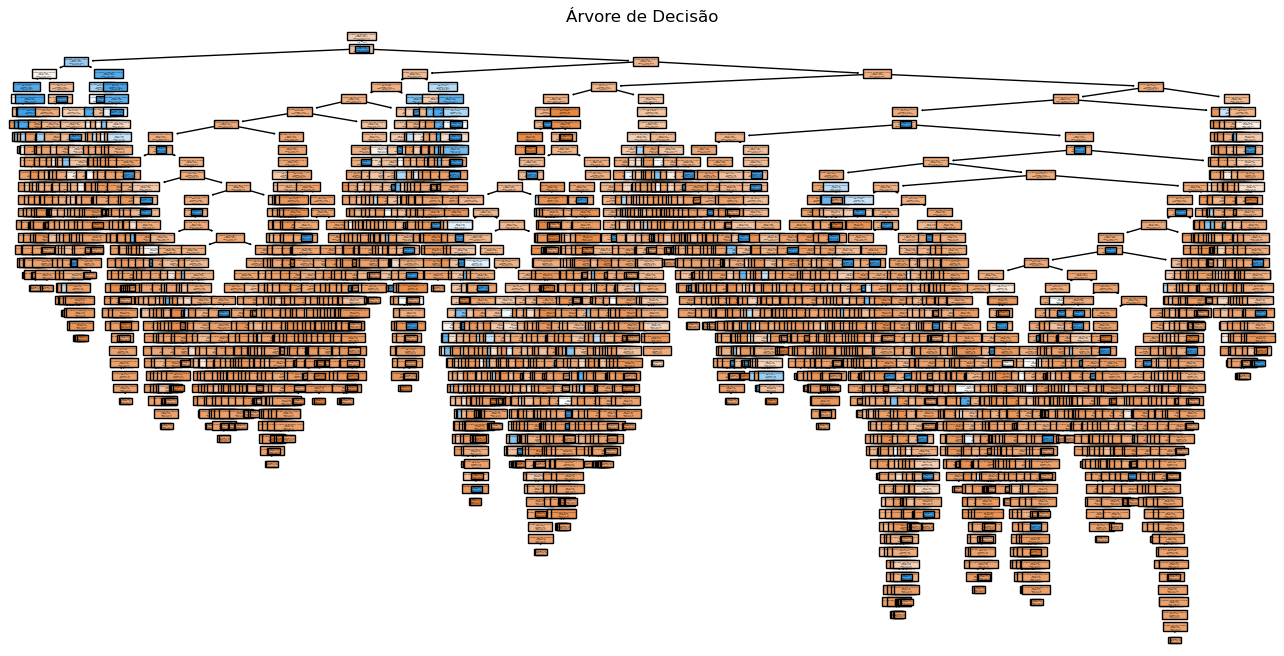

In [5]:
param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)
grid_tree = GridSearchCV(dt, param_grid_tree, cv=kf, scoring='accuracy')
grid_tree.fit(X, y)

print("Árvore de Decisão")
print("Melhores parâmetros:", grid_tree.best_params_)
print("Acurácia média:", grid_tree.best_score_)

# Visualizar árvore
plt.figure(figsize=(16,8))
plot_tree(grid_tree.best_estimator_, feature_names=X.columns, class_names=['Non', 'Resp'], filled=True)
plt.title("Árvore de Decisão")
plt.show()


In [6]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'max_iter': [300]
}

mlp = MLPClassifier(random_state=42)
grid_mlp = GridSearchCV(mlp, param_grid_mlp, cv=kf, scoring='accuracy')
grid_mlp.fit(X, y)

print("\nRede Neural")
print("Melhores parâmetros:", grid_mlp.best_params_)
print("Acurácia média:", grid_mlp.best_score_)



Rede Neural
Melhores parâmetros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'max_iter': 300}
Acurácia média: 0.6323787190113704


In [10]:
param_grid_knn = {
    'n_neighbors': list(range(1, 11)),
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=kf, scoring='accuracy')
grid_knn.fit(X, y)

print("\nKNN")
print("Melhores parâmetros:", grid_knn.best_params_)
print("Acurácia média:", grid_knn.best_score_)



KNN
Melhores parâmetros: {'n_neighbors': 6, 'weights': 'distance'}
Acurácia média: 0.8823689364769084
